# Loan default prediction analysis

## The Data

This project uses a modified version of the data from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club
The data has been modified to include empty entries, in order to showcase data cleaning techniques.

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given this historical data, this project aims to build a model that can predict whether an applicant is likely to default on a loan.

### Data Overview

The label is given by 'loan_status', with either 'Fully Paid' or 'Charged Off' as potential labels

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Loading the data and other imports

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_recall_curve, auc
from sklearn.ensemble import AdaBoostClassifier

In [8]:
df = pd.read_csv('lending_club_loan_two.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Exploratory Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

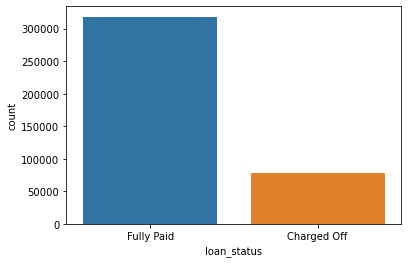

In [10]:
sns.countplot(x='loan_status', data=df)

Text(0.5, 1.0, 'Histogram of loan amounts')

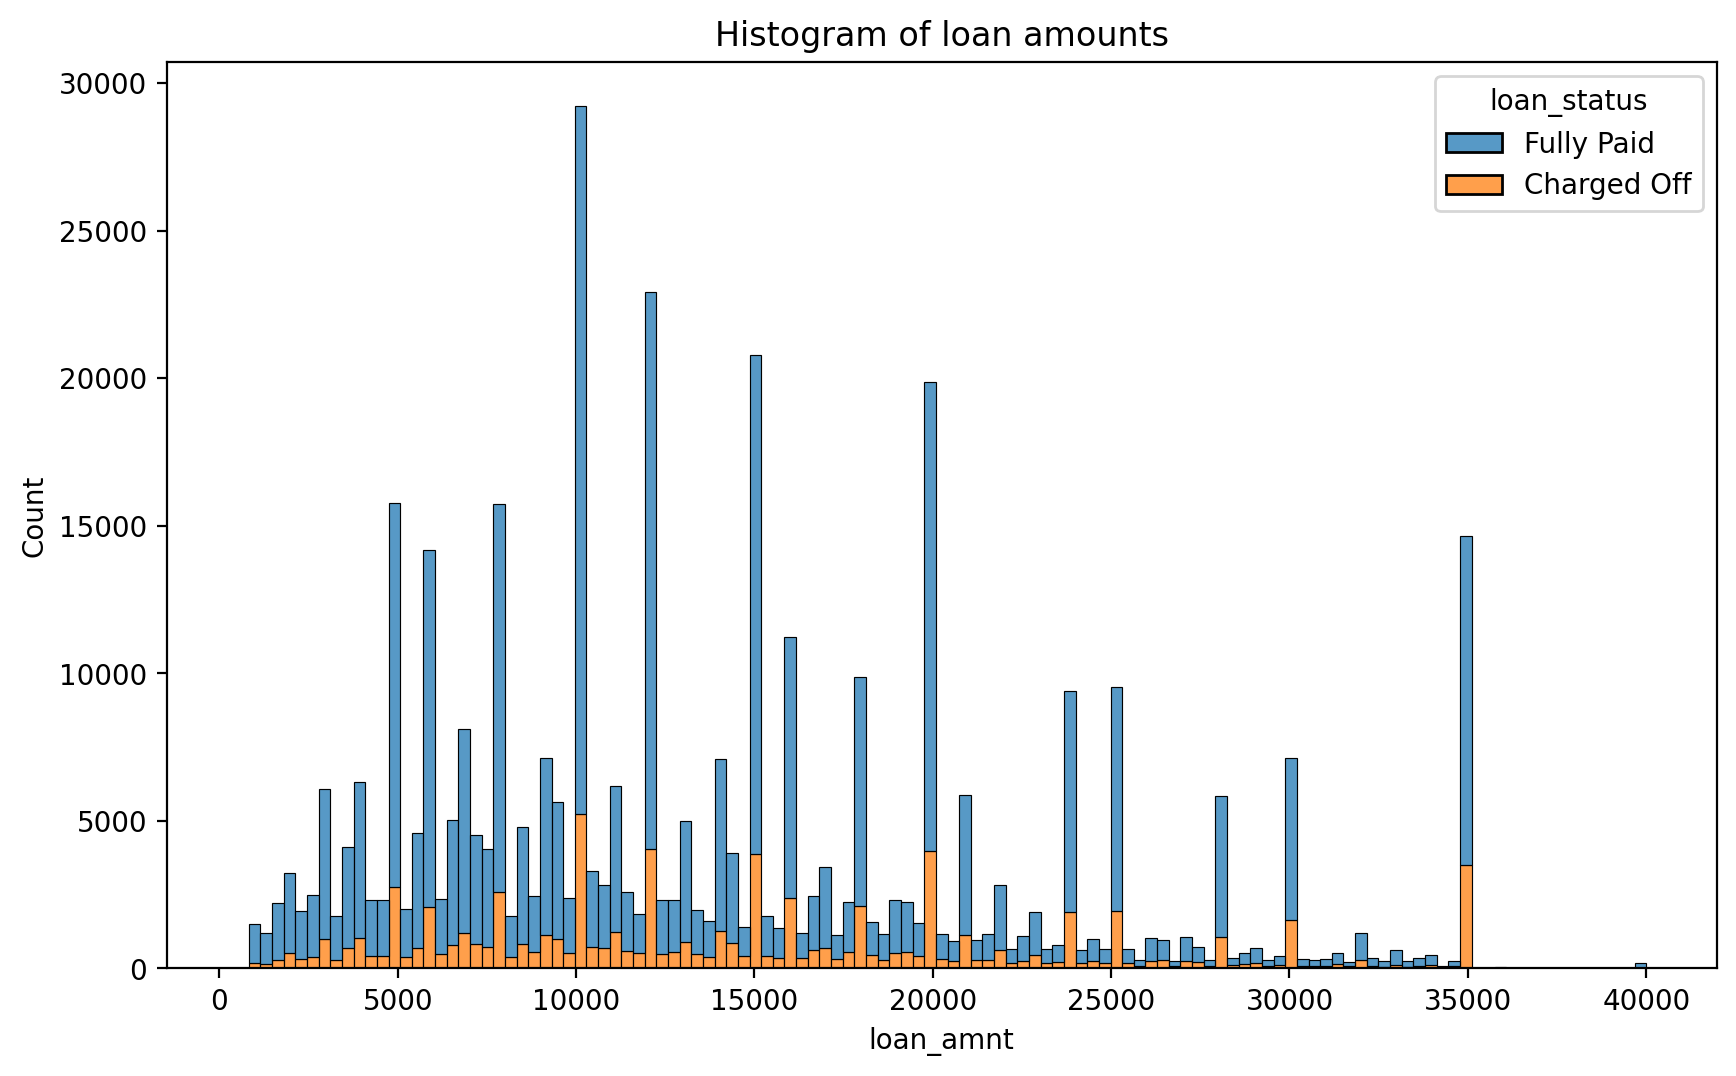

In [204]:
plt.figure(figsize=(10, 6), dpi=200)
sns.histplot(x='loan_amnt', data=df, hue='loan_status', multiple='stack')
plt.title("Histogram of loan amounts")

### Correlation of variables

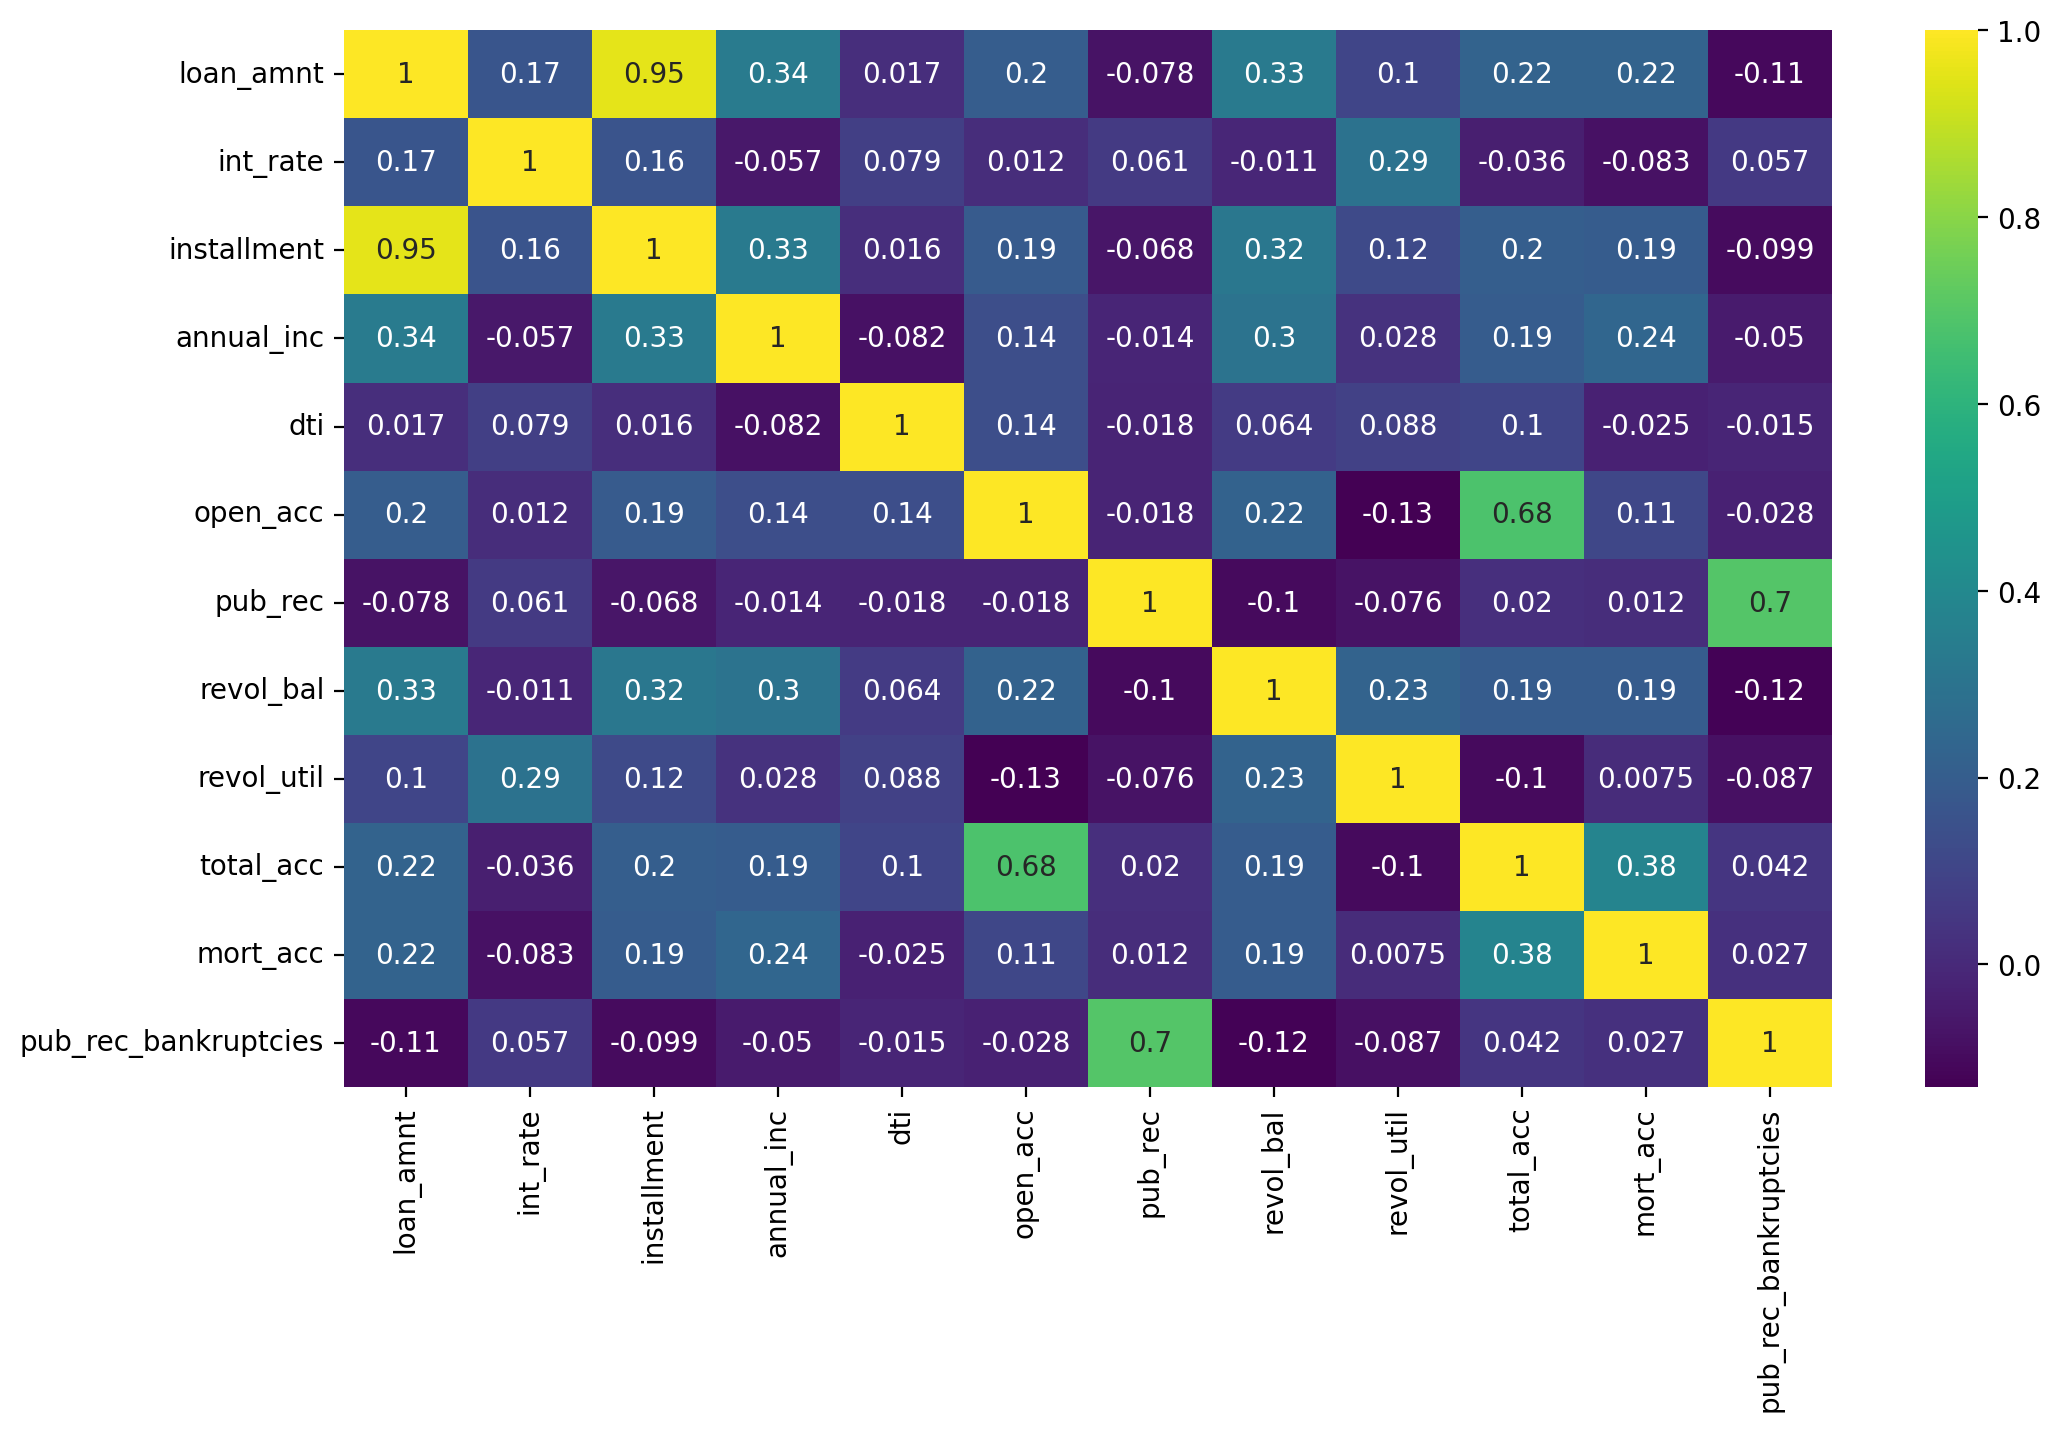

In [13]:
plt.figure(figsize=(12, 7), dpi=200)
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

There seems to be very strong correlation between 'installment' and 'loan_amnt', so these variables are plotted against each other

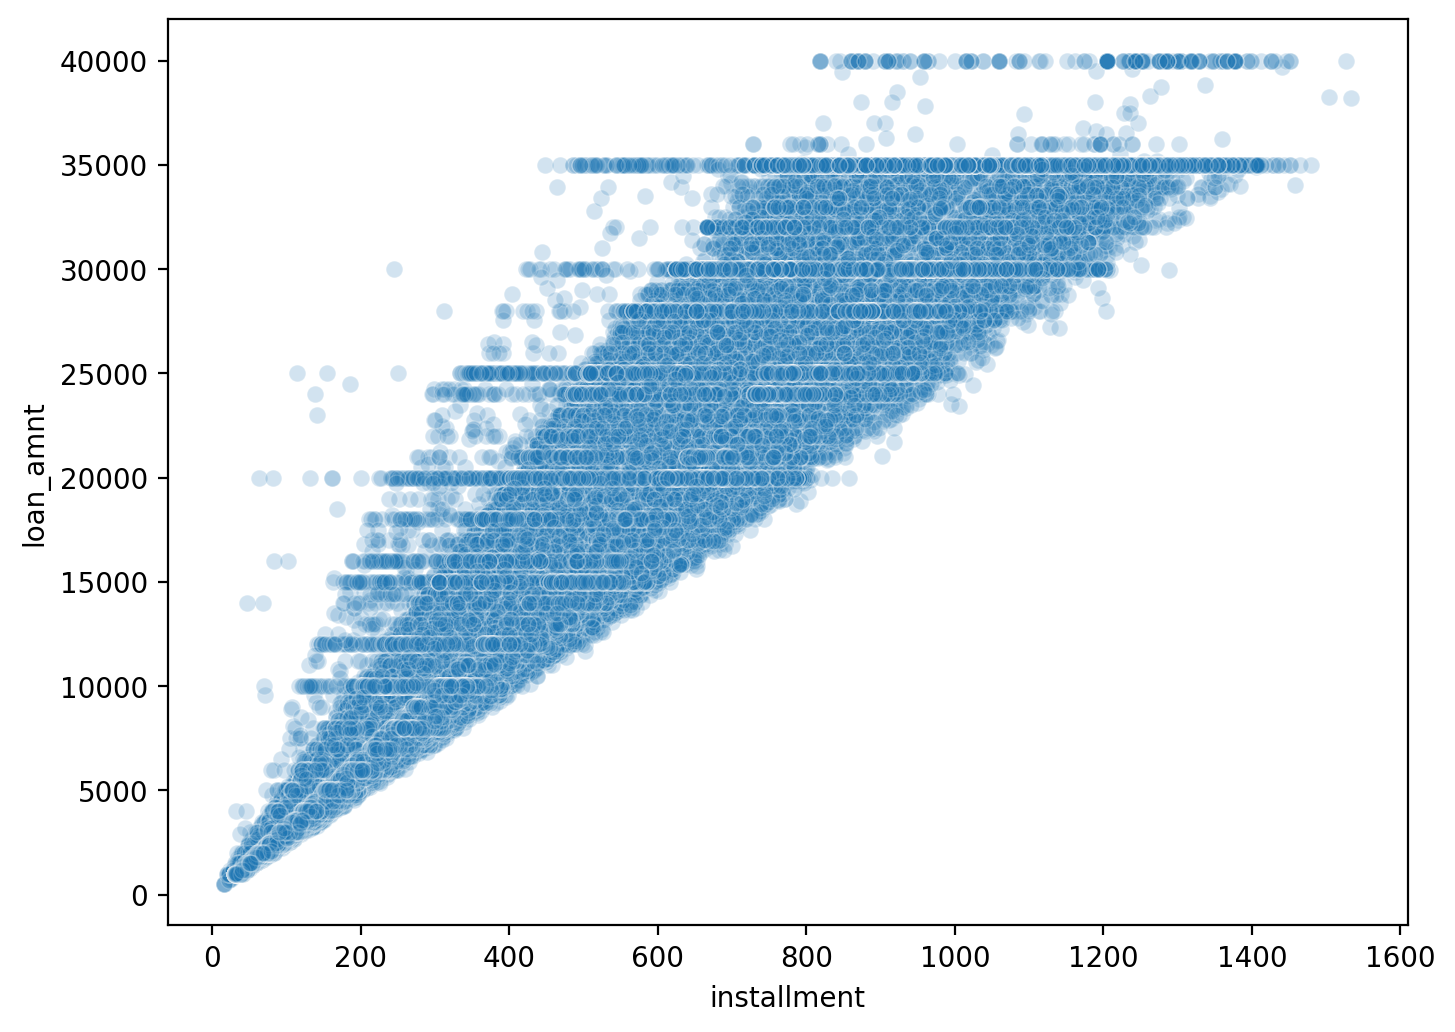

In [14]:
plt.figure(figsize=(8, 6), dpi=200)
sns.scatterplot(x='installment', y='loan_amnt', data=df, alpha=0.2)
plt.show()

There also seems to be strong correlation between 'pub_rec_bankrupties' and 'pub_rec', so these variables are plotted against each other. Although there are outliers/anomalies, a certain trend does seem to be followed by the majority.

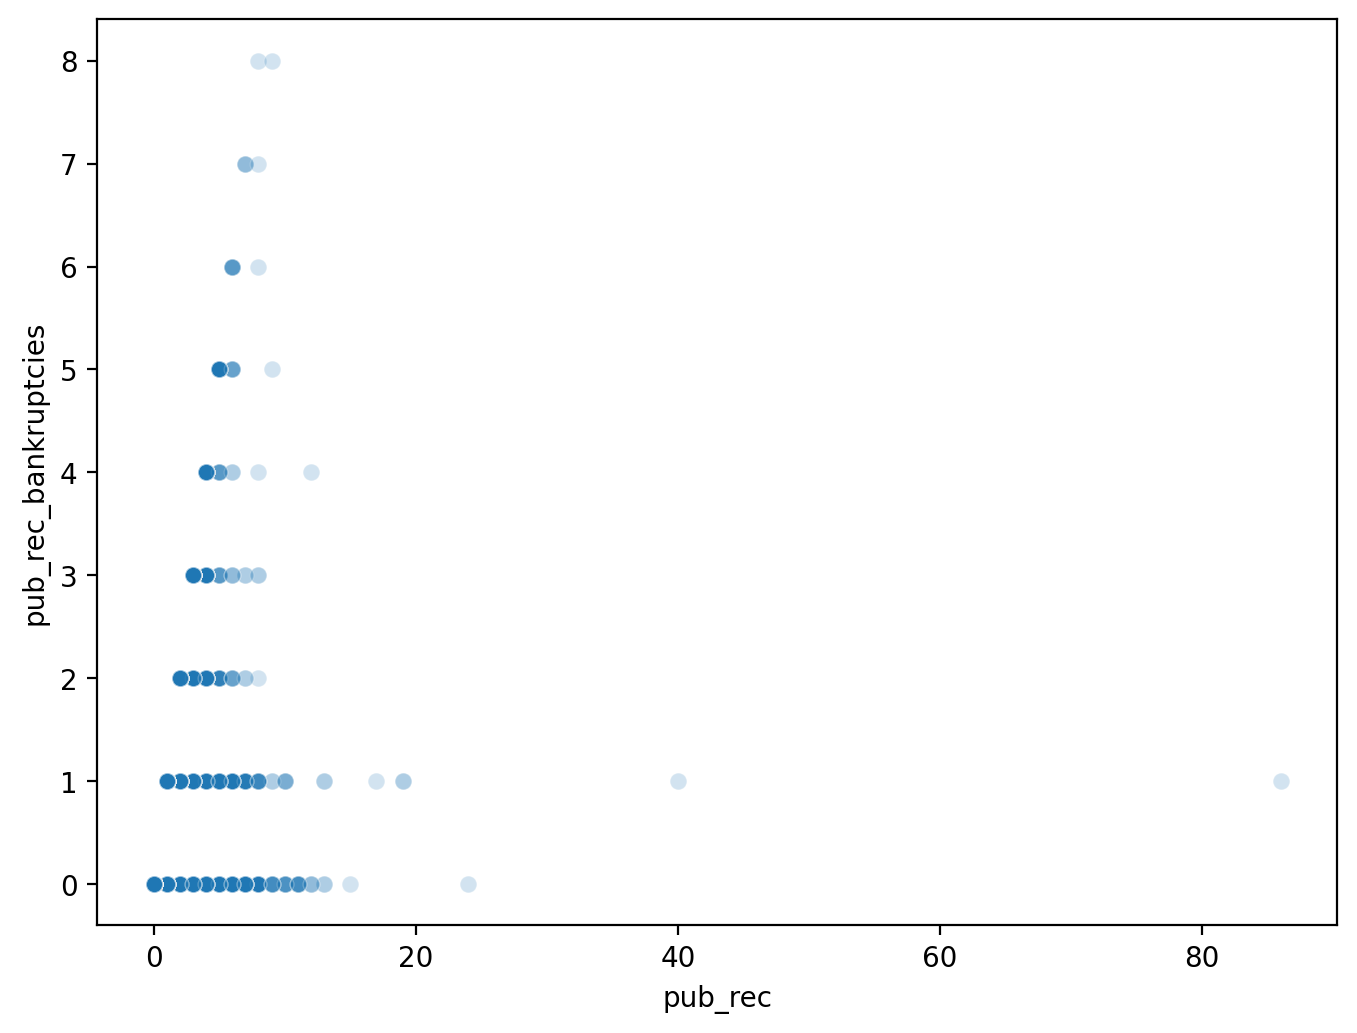

In [15]:
plt.figure(figsize=(8, 6), dpi=200)
sns.scatterplot(x='pub_rec', y='pub_rec_bankruptcies', data=df, alpha=0.2)
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

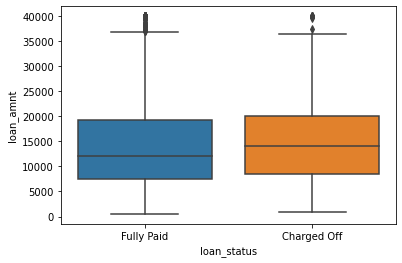

In [18]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

### Summary statistics of the loan amount, grouped by loan status

In [19]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


### Grade and subgrade variable analysis

In [20]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [21]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

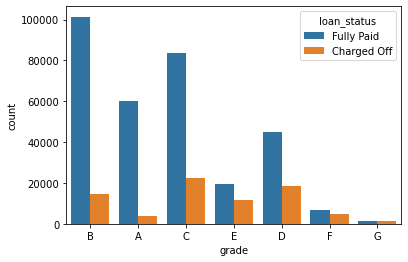

In [22]:
sns.countplot(x='grade', data=df, hue='loan_status')
plt.show()

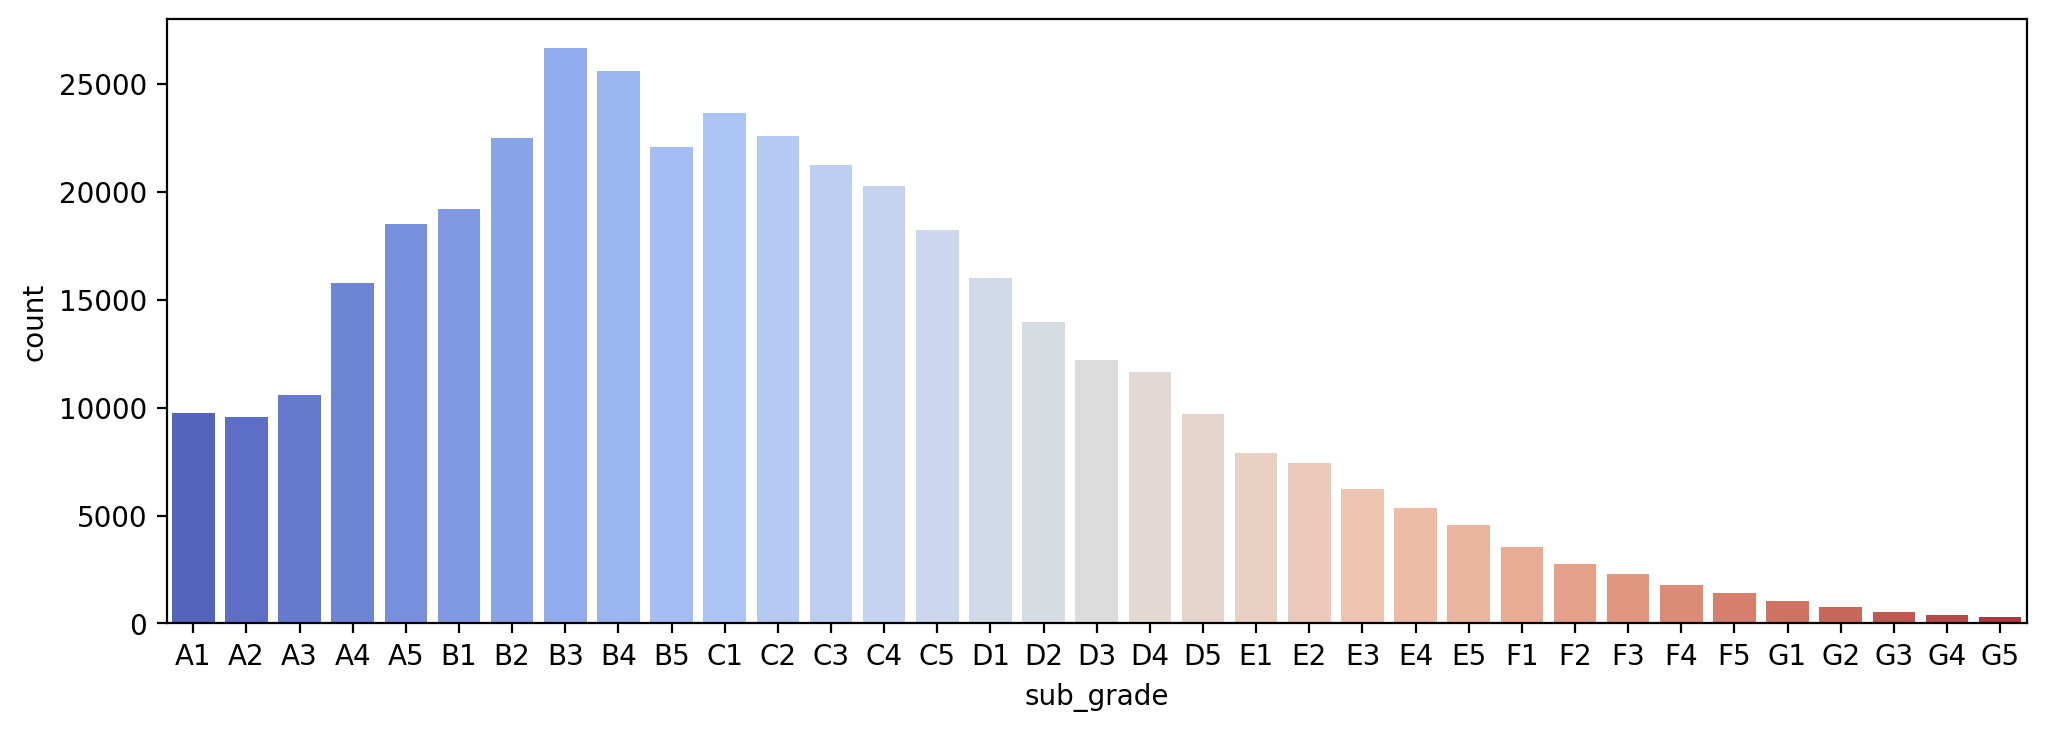

In [23]:
plt.figure(figsize=(12, 4), dpi=200)
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette='coolwarm')
plt.show()

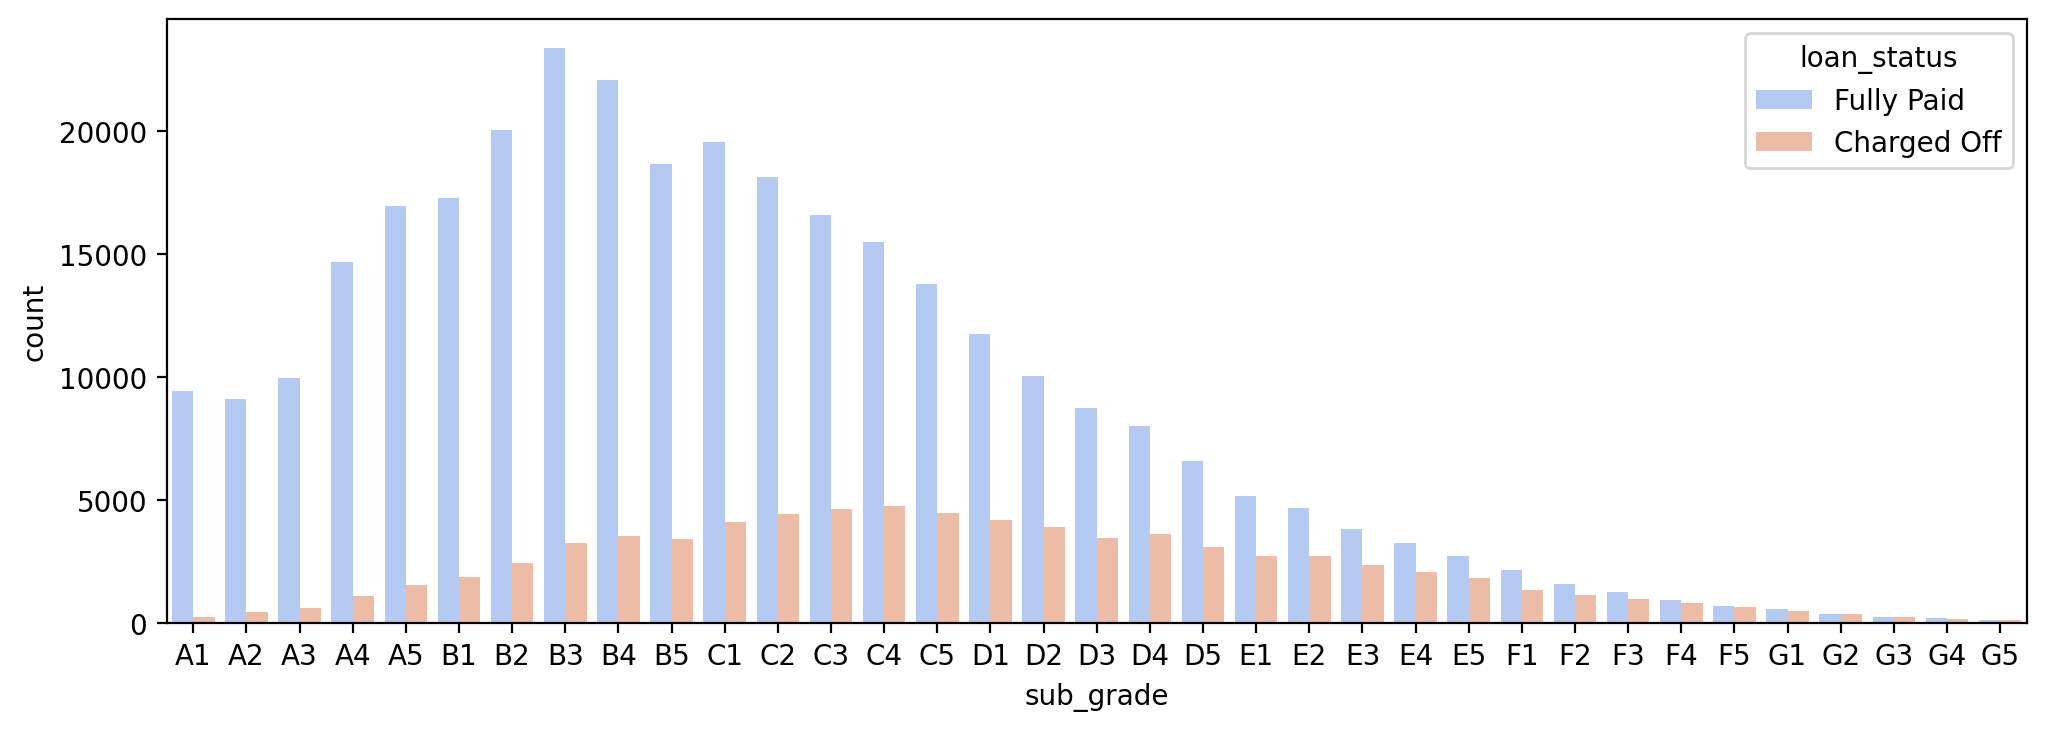

In [24]:
plt.figure(figsize=(12, 4), dpi=200)
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette='coolwarm', hue='loan_status')
plt.show()

### Graph showing correlation of numerical variables with the label

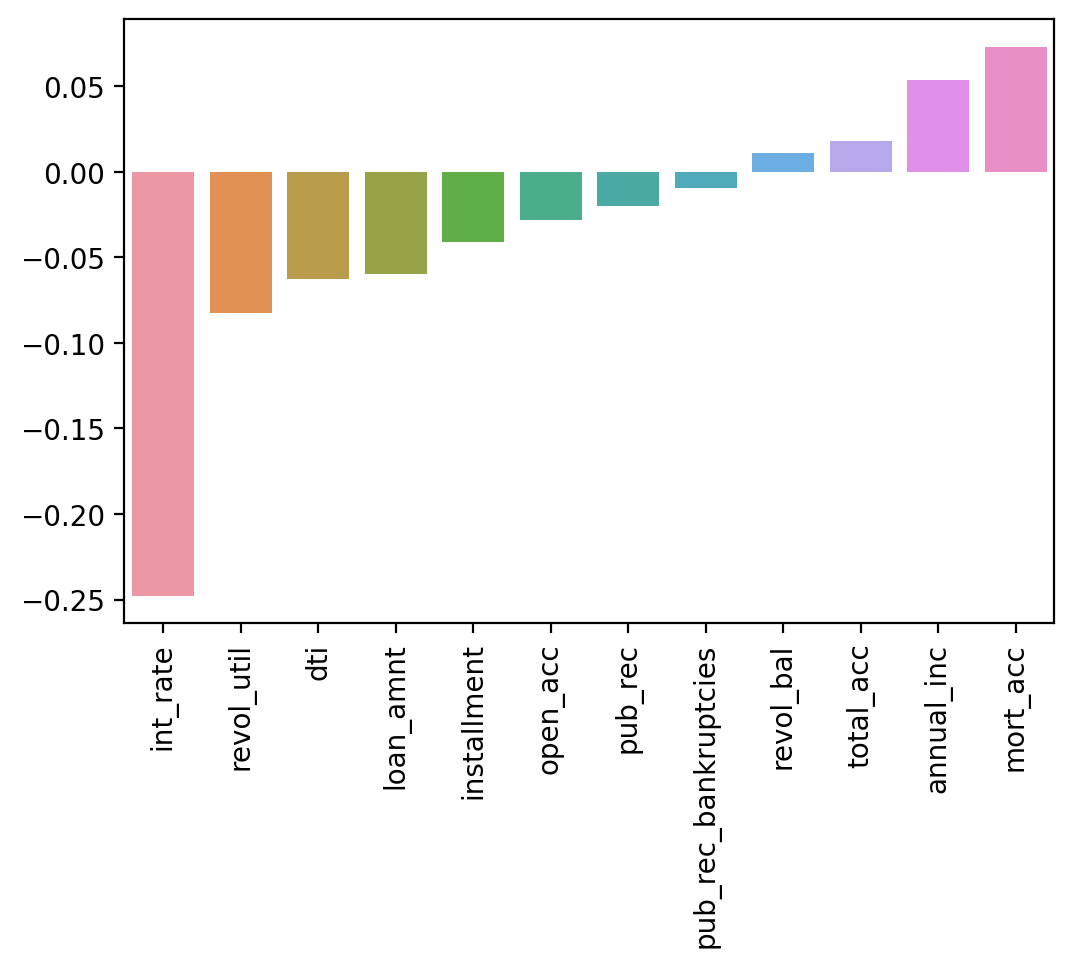

In [25]:
df['loan_status10'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})
corr = df.corr()['loan_status10'].sort_values(ascending=True)

plt.figure(figsize=(6, 4), dpi=200)
sns.barplot(x=corr.drop('loan_status10').index, y=corr.drop('loan_status10').values)
plt.xticks(rotation=90)
plt.show()


# Data PreProcessing

In [26]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status10
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


# Missing Data

Here a variety of factors and methods are used to decide whether to keep the data, fill in the gaps, or discard it

In [27]:
# Length of the dataframe (number of rows)
len(df)

396030

Number of missing values per column

In [28]:
pd.Series(df.isna().sum())

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_status10               0
dtype: int64

Percentage of missing rows per column

In [29]:
df.isna().sum() * 100 / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_status10           0.000000
dtype: float64

Examine 'emp_title' and 'emp_length' to decide whether to keep them

In [30]:
df['emp_title'].nunique()

173105

How many unique job titles are there?

In [31]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**As there are too many unique job titles to make into dummy variables, the variable 'emp_title' is dropped from the dataframe**

In [32]:
df = df.drop(['emp_title'], axis=1)

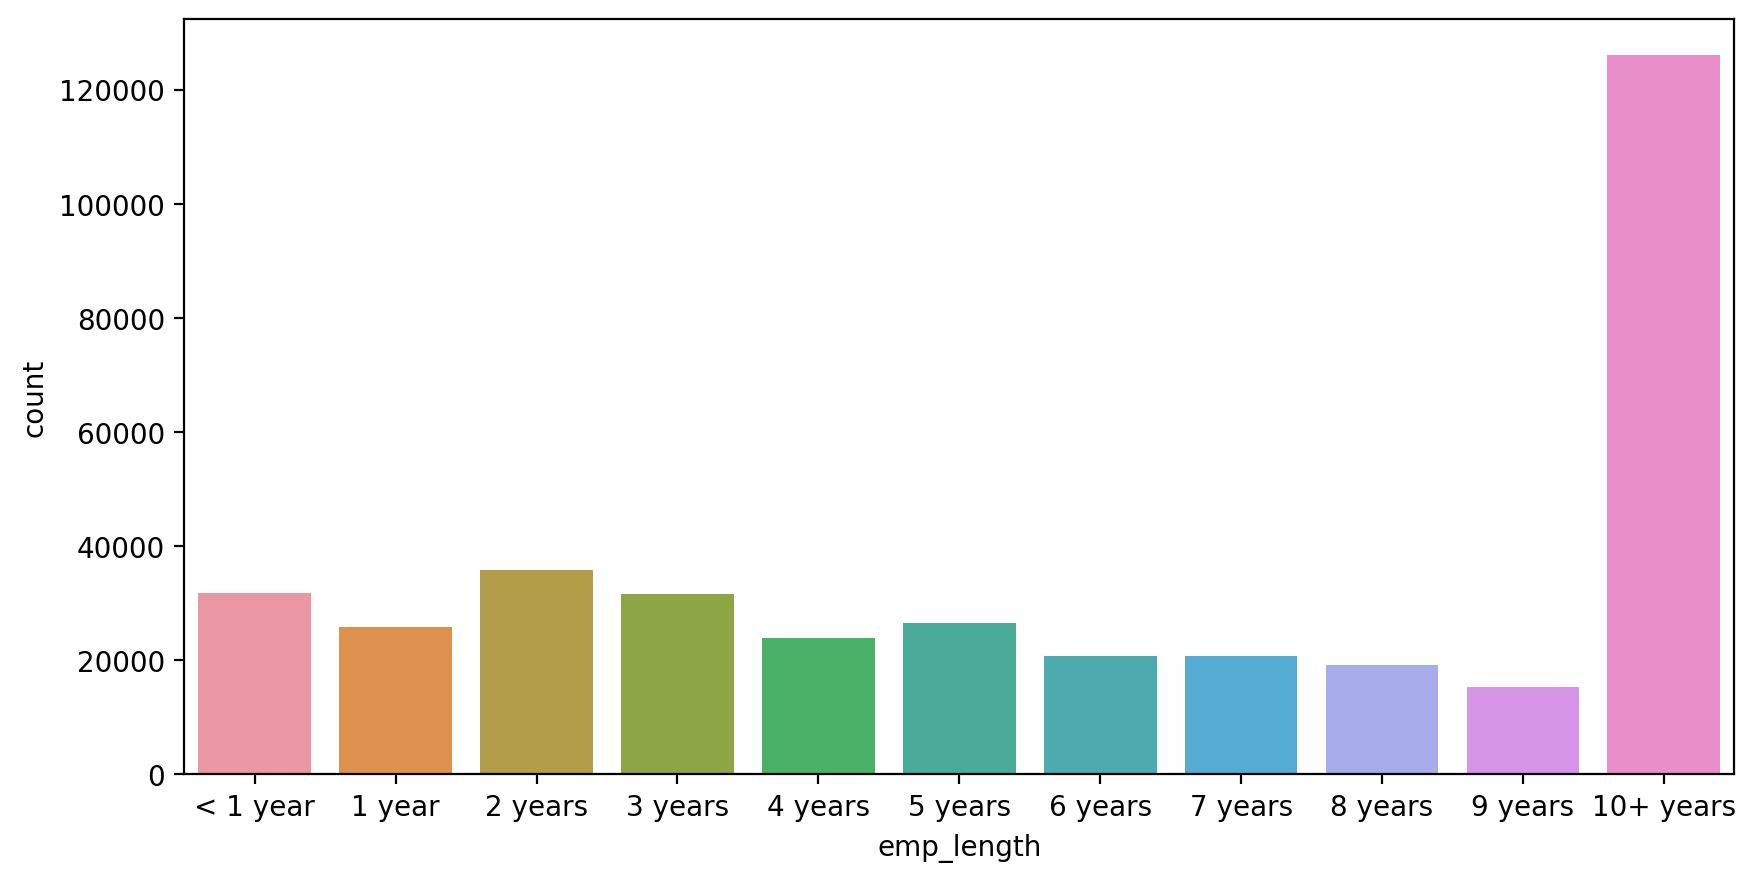

In [33]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

plt.figure(figsize=(10, 5), dpi=200)
sns.countplot(x='emp_length', data=df, order=emp_length_order)
plt.show()

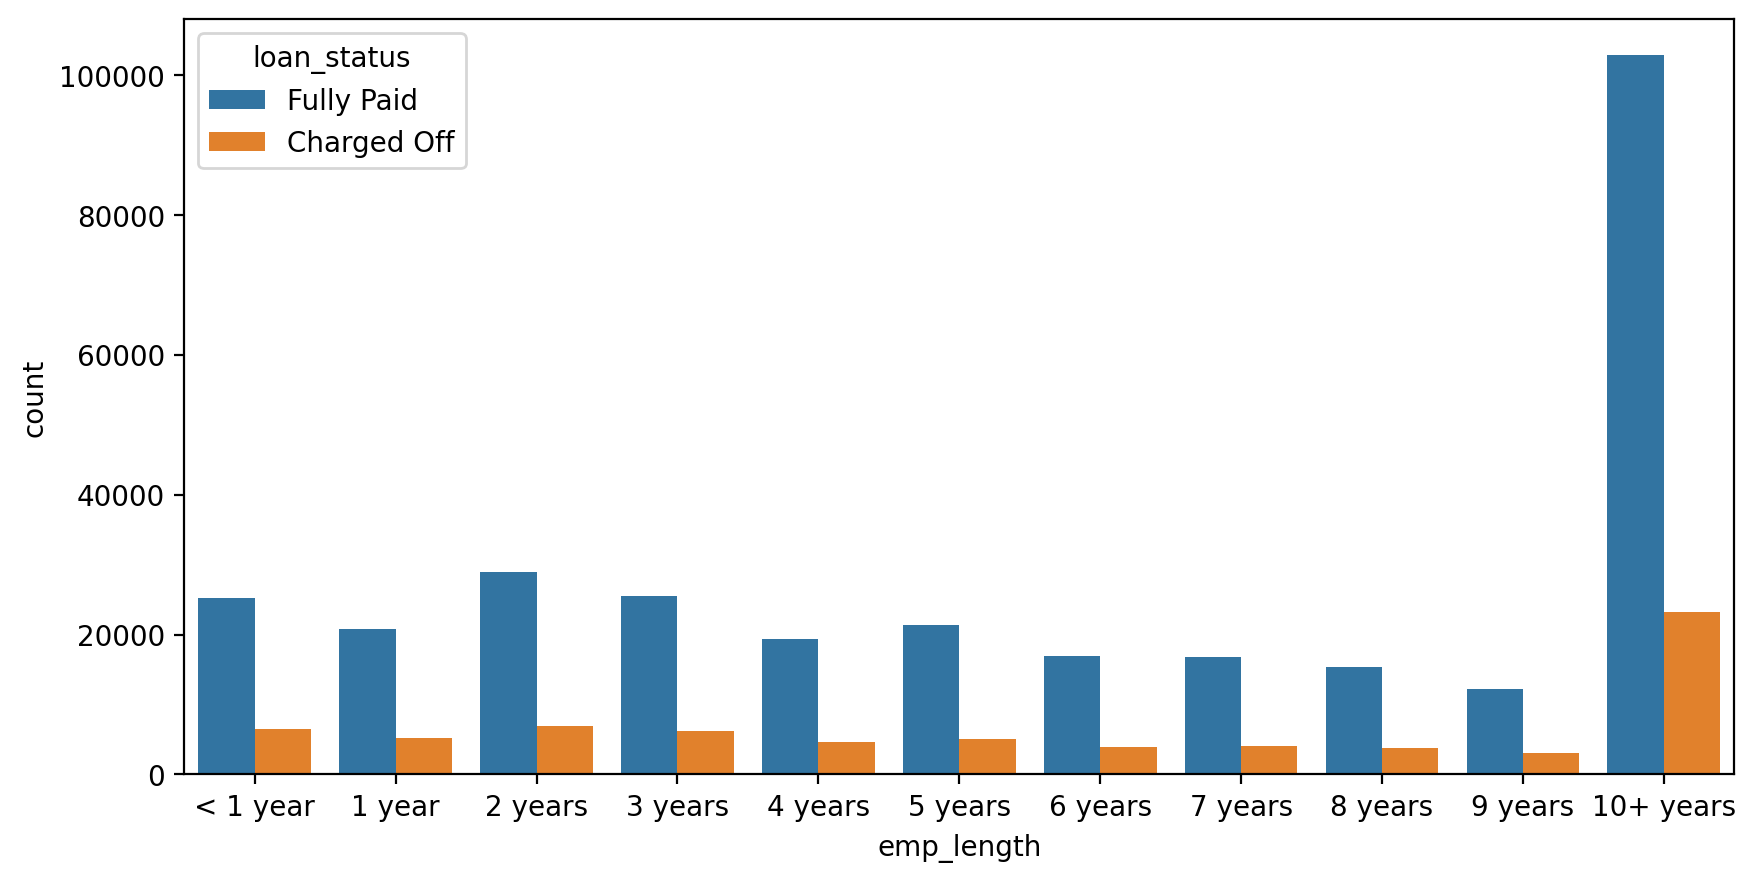

In [34]:
plt.figure(figsize=(10, 5), dpi=200)
sns.countplot(x='emp_length', data=df, order=emp_length_order, hue='loan_status')
plt.show()

**Examine whether there's a strong relationsip between the variable 'emp_length' and whether the loan is paid off**

The percentage of people who paid off their loan per cohort of emp_length is calculated and plotted

In [35]:
emp_length_perc = df.groupby('emp_length')['loan_status10'].agg('sum') / df.groupby('emp_length')['loan_status10'].agg('count')
emp_length_perc

emp_length
1 year       0.800865
10+ years    0.815814
2 years      0.806738
3 years      0.804769
4 years      0.807615
5 years      0.807813
6 years      0.810806
7 years      0.805226
8 years      0.800240
9 years      0.799530
< 1 year     0.793128
Name: loan_status10, dtype: float64

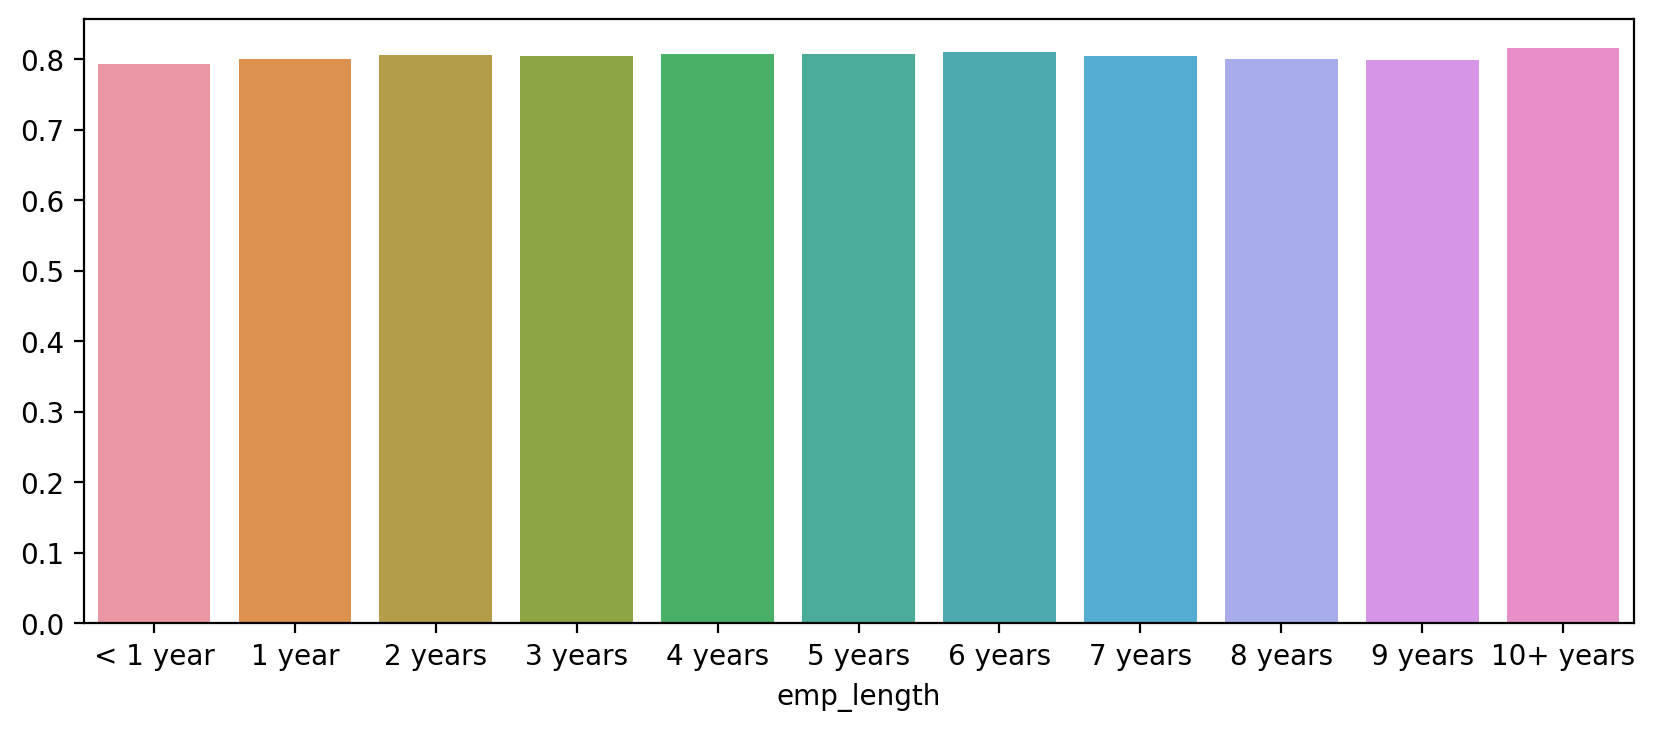

In [36]:
plt.figure(figsize=(10, 4), dpi=200)
sns.barplot(x=emp_length_perc.index, y=emp_length_perc.values, order=emp_length_order)
plt.show()

**Charge off rates are very similar for each cohort of emp_length, so this variable is dropped**

In [37]:
df = df.drop('emp_length', axis=1)

**Examine which variables still have missing data**

In [38]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_status10               0
dtype: int64

In [39]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [40]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**'title' and 'purpose' seem to be repeated information, so 'title' is dropped as it contains missing data**

In [41]:
df = df.drop('title', axis=1)

**value_counts of the mort_acc column**

In [42]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**There are a lot of missing values, and this is likely an important column, so check whether this column correlates with any others**

In [43]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_status10           0.073111
Name: mort_acc, dtype: float64

**As total_acc correlates quite strongly with mort_acc, this can be used to fill in the missing data**

The mean is taken for the mort_acc, grouped by total_acc

This mean is then used to fill in the missing values of mort_acc. When a value is found to be missing, that row's total_acc value is taken, and its mort_acc value is filled by taking the mean mort_acc for that particular total_acc

In [44]:
tot_acc_avg = df.groupby('total_acc').mean()['mort_acc']
tot_acc_avg.head(10)

total_acc
2.0     0.000000
3.0     0.052023
4.0     0.066743
5.0     0.103289
6.0     0.151293
7.0     0.221695
8.0     0.308422
9.0     0.365499
10.0    0.429158
11.0    0.526570
Name: mort_acc, dtype: float64

In [45]:
def mort_acc_avg_calc(total_acc, mort_acc):

    if np.isnan(mort_acc):
        mort_acc_avg = tot_acc_avg[total_acc]
        return mort_acc_avg
    else:
        return mort_acc

In [46]:
df['mort_acc'] = df.apply(lambda x: mort_acc_avg_calc(x['total_acc'], x['mort_acc']), axis=1)

**'revol_util' and 'pub_rec_bankrupties' have missing values, but account for less than 0.5% of the total data, so and rows missing these values are removed from the dataframe**

In [48]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_status10             0
dtype: int64

In [49]:
df = df.dropna()

In [50]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_status10           0
dtype: int64

## Categorical Variables and Dummy Variables

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

In [52]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status10
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


**'term' feature is relabelled as an integer rather than a string**

In [53]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [54]:
df['term'] = df['term'].map({' 36 months': 36, ' 60 months': 60})

**As grade and subgrade are related, this is repeating of information, so grade is dropped**

In [55]:
df.drop('grade', axis=1, inplace=True)

**Dummies made of 'sub_grade' variable and dummies concatenated with the original dataframe**
**The original 'sub_grade' feature is dropped from the original dataframe**

In [56]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
df = df.drop('sub_grade', axis=1)
df = df.join(dummies)

**'verification_status', 'application_type', 'initial_list_status', 'purpose' are made into dummies are concatenated with original df. Original variables are dropped from df**

In [57]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_status10', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [58]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1)
df = df.join(dummies)

**home_ownership is converted to dummy variables, but NONE and ANY are also replaced with OTHER**

In [59]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [60]:
df['home_ownership'] = df['home_ownership'].map({'NONE': 'OTHER', 'ANY': 'OTHER'})
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = df.drop('home_ownership', axis=1)
df = df.join(dummies)

**Extract the zip code from the address and remove the address column from the df. As zip code is not a continuous variable, dummies are made of it**

In [61]:
df['zip'] = df['address'].map(lambda address: address.rstrip()[-5:])
df = df.drop('address', axis=1)

In [62]:
df['zip'].nunique()

10

In [63]:
dummies = pd.get_dummies(df['zip'], drop_first=True)
df = df.drop('zip', axis=1)
df = df.join(dummies)

**issue_d is removed, as this would be data leakage. We can't know if a loan was issued to the person when deciding on whether to give them a loan**

In [64]:
df = df.drop('issue_d', axis=1)

**'earliest_cr_line' has its year extracted and added to the df as 'earliest_cr_year'. 'earliest_cr_line' is removed from the df.**

In [65]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date.rstrip()[-4:]))
df = df.drop('earliest_cr_line', axis=1)

## Train Test Split

In [66]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_status10', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', '05113', '11650', '22690',
       '29597', '30723',

In [72]:
X = df.drop(['loan_status10', 'loan_status'], axis=1)
y = df['loan_status10']

In [73]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalise the data

In [94]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

## Model 1 - ANN

In [95]:
X_train.shape

(316175, 75)

In [164]:
# CODE HERE
model = Sequential()

model.add(Dense(75, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [165]:
early_stop = EarlyStopping(monitor='val_loss', verbose=0, patience=25, mode='min')
# class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# class_weights = dict(enumerate(class_weights))

model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), callbacks=early_stop, batch_size=256)

Epoch 1/300
1236/1236 [==============================] - 2s 1ms/step - loss: 0.3250 - accuracy: 0.8653 - val_loss: 0.2654 - val_accuracy: 0.8869
Epoch 2/300
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2773 - accuracy: 0.8803 - val_loss: 0.2646 - val_accuracy: 0.8869
Epoch 3/300
1236/1236 [==============================] - 1s 952us/step - loss: 0.2750 - accuracy: 0.8805 - val_loss: 0.2636 - val_accuracy: 0.8869
Epoch 4/300
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2742 - accuracy: 0.8802 - val_loss: 0.2646 - val_accuracy: 0.8869
Epoch 5/300
1236/1236 [==============================] - 1s 959us/step - loss: 0.2736 - accuracy: 0.8804 - val_loss: 0.2634 - val_accuracy: 0.8869
Epoch 6/300
1236/1236 [==============================] - 1s 960us/step - loss: 0.2724 - accuracy: 0.8807 - val_loss: 0.2641 - val_accuracy: 0.8869
Epoch 7/300
1236/1236 [==============================] - 1s 978us/step - loss: 0.2724 - accuracy: 0.8803 - val_loss: 0.2628 

## Evaluate model 1's performance

<AxesSubplot:>

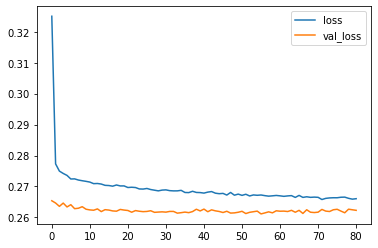

In [167]:
losses = pd.DataFrame(model.history.history)

losses[['loss', 'val_loss']].plot()

In [168]:
preds = (model.predict(X_test) > 0.75).astype("int32")
print(classification_report(y_test, preds))
# preds

              precision    recall  f1-score   support

           0       0.58      0.72      0.64     15658
           1       0.93      0.87      0.90     63386

    accuracy                           0.84     79044
   macro avg       0.75      0.80      0.77     79044
weighted avg       0.86      0.84      0.85     79044



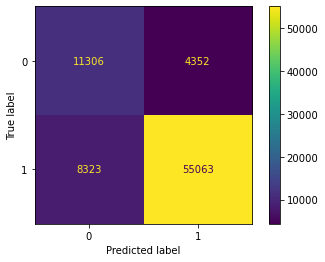

In [169]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)

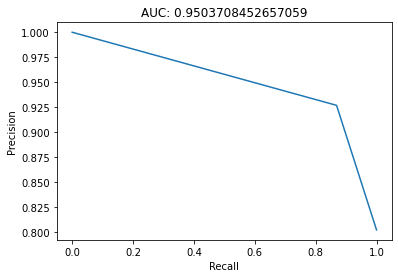

In [173]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
auc_val = auc(recall, precision)
sns.lineplot(x=recall, y=precision)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'AUC: {auc_val}')
plt.show()

## Model 2 - ANN with balancing of classes using class_weight parameter in keras

In [182]:
weight_for_0 = (1 / len(df[df['loan_status10']==0])) * (len(df) / 2.0)
weight_for_1 = (1 / len(df[df['loan_status10']==1])) * (len(df) / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 2.55
Weight for class 1: 0.62


In [183]:
model = Sequential()

model.add(Dense(75, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [184]:
early_stop = EarlyStopping(monitor='val_loss', verbose=0, patience=25, mode='min')
# class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# class_weights = dict(enumerate(class_weights))

model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), callbacks=early_stop, batch_size=256, class_weight=class_weight)

Epoch 1/300
1236/1236 [==============================] - 2s 1ms/step - loss: 0.4361 - accuracy: 0.7367 - val_loss: 0.3839 - val_accuracy: 0.7638
Epoch 2/300
1236/1236 [==============================] - 1s 1ms/step - loss: 0.3768 - accuracy: 0.7761 - val_loss: 0.3626 - val_accuracy: 0.7948
Epoch 3/300
1236/1236 [==============================] - 1s 1ms/step - loss: 0.3732 - accuracy: 0.7765 - val_loss: 0.3538 - val_accuracy: 0.8030
Epoch 4/300
1236/1236 [==============================] - 1s 1ms/step - loss: 0.3714 - accuracy: 0.7794 - val_loss: 0.3636 - val_accuracy: 0.7820
Epoch 5/300
1236/1236 [==============================] - 1s 1ms/step - loss: 0.3706 - accuracy: 0.7809 - val_loss: 0.3657 - val_accuracy: 0.7894
Epoch 6/300
1236/1236 [==============================] - 1s 1ms/step - loss: 0.3695 - accuracy: 0.7845 - val_loss: 0.3781 - val_accuracy: 0.7696
Epoch 7/300
1236/1236 [==============================] - 1s 1ms/step - loss: 0.3689 - accuracy: 0.7849 - val_loss: 0.3818 - val_ac

## Evaluate model 2

<AxesSubplot:>

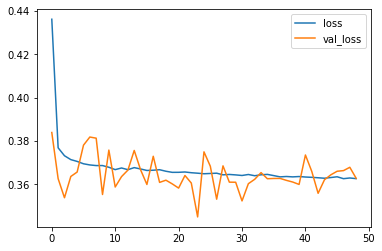

In [185]:
losses = pd.DataFrame(model.history.history)

losses[['loss', 'val_loss']].plot()

In [186]:
preds = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.48      0.82      0.60     15658
           1       0.95      0.78      0.85     63386

    accuracy                           0.78     79044
   macro avg       0.71      0.80      0.73     79044
weighted avg       0.85      0.78      0.80     79044



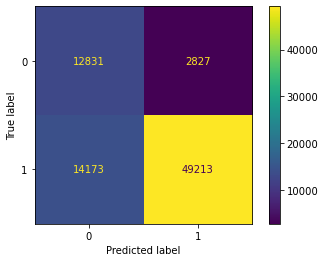

In [187]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)

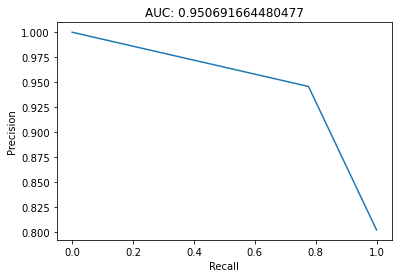

In [188]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
auc_val = auc(recall, precision)
sns.lineplot(x=recall, y=precision)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'AUC: {auc_val}')
plt.show()

## Model 3 - Boosted Decision Tree classifier (AdaBoost)

In [190]:
param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}

model = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid)
model.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [20, 50, 100, 200]})

In [194]:
model.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=200)

## Evaluate model 3

**Best estimator seems to be with a learning rate of 1, and n_estimators as 200. As 200 is the limit of what was tested, high numbers can be tested for 'n_estimators' to see if this impacts performance**

In [195]:
preds = model.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.90      0.89      0.87     79044



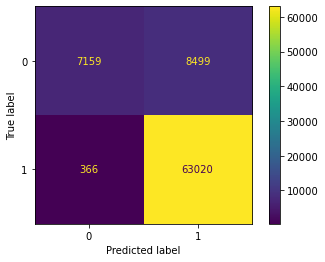

In [196]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)

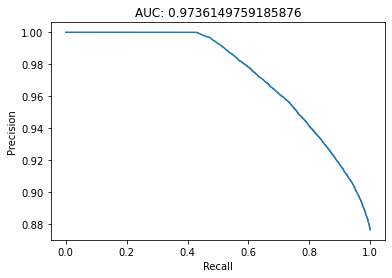

In [203]:
preds_prob = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, preds_prob[:,1])
auc_val = auc(recall, precision)
sns.lineplot(x=recall, y=precision)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'AUC: {auc_val}')
plt.show()


## Commentary

All three models gave similar performance.

It is difficult to have a high recall for class 0 (didn't pay back), without a low precision for class 1 (did pay back). Therefore a balance needs to be struck, depending on the needs of the financial institution or person lending the money. If only very few people defaulting on their loans can be tolerated, these models will also exclude many people who would pay back. The tolerance can of course be modified by applying a different cut off for deciding if a result belongs to each class (e.g. probability must be >0.7 for class 0)

The boosted decision tree arguably had the best performance, as it has the highest 'area under the curve' shown on the precision-recall graph. It also had good 'out of the box' results as shown by the classification report. However, this model was computationally very expensive to train (over 30 minutes on my M1 Macbook!), and the AUC was only slightly higher. 

There are, of course, many parameters that can be changed and explored further on all three models, and other algorithms could be tried to potentially yield better results.